# 2019-yil uchun "20-yanvar" supermarketidagi savdo holati

In [2]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [3]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/20%20yanvar.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,MACCOFFEE 24GR KOFE 3V1 CAFE PHO,"Kofe, kakao va h.k",0.45,2019-09-13,True
1,XORTICYA 1LT ARAQ ABSOLUTNAYA GOLD S/Q,Aroq,20.00,2019-09-13,True
2,BAGDAT 40GR BIBER ACI QIRMIZI PAKET,Ziravorlar,1.35,2019-09-13,True
3,PAREX KELEBEK MOP YEDEK,Maishiy buyumlar,2.10,2019-09-13,True
4,JITNICA 0.5LT SEDRAYA ARAQ,Aroq,12.00,2019-09-13,True
5,DIET.VERESK 105GR VAFLI TAPLENOE MOL.NA FRUKTOZE,Diabet mahsulotlari,0.80,2019-09-13,True
6,EVDAR 800GR NOXUD,Donli mahsulotlar,3.05,2019-09-13,True
7,ELVAN 45GR TODAY PANDA KEKS,Shirinliklar,0.40,2019-01-07,True
8,ALLEYA ISTOCNIKOV 0.5LT ESSENTUKI N4 S/Q,Suvlar,1.10,2019-01-07,True
9,BEREKETLI RUZI 20GR QARA ISTIOT UYUDULMUS POSET,Ziravorlar,0.90,2019-01-07,True


In [4]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20529 entries, 0 to 20528
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20529 non-null  object 
 1   mahsulot_turi   20529 non-null  object 
 2   mahsulot_narhi  20529 non-null  float64
 3   sotilgan_vaqti  20529 non-null  object 
 4   bonus_karta     20529 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 661.7+ KB


In [5]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [6]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20529 entries, 0 to 20528
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20529 non-null  object        
 1   mahsulot_turi   20529 non-null  object        
 2   mahsulot_narhi  20529 non-null  float64       
 3   sotilgan_vaqti  20529 non-null  datetime64[ns]
 4   bonus_karta     20529 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 661.7+ KB


In [7]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2000
1777
2030
2148
1924
2019
2119
2096
2079
2315
22
0


In [8]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2000
1777
2030
2148
1924
2019
2119
2096
2079
2315
0
0


In [9]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,MACCOFFEE 24GR KOFE 3V1 CAFE PHO,"Kofe, kakao va h.k",0.45,2019-09-13,True
1,XORTICYA 1LT ARAQ ABSOLUTNAYA GOLD S/Q,Aroq,20.00,2019-09-13,True
2,BAGDAT 40GR BIBER ACI QIRMIZI PAKET,Ziravorlar,1.35,2019-09-13,True
3,PAREX KELEBEK MOP YEDEK,Maishiy buyumlar,2.10,2019-09-13,True
4,JITNICA 0.5LT SEDRAYA ARAQ,Aroq,12.00,2019-09-13,True
...,...,...,...,...,...
20524,BAGDAT 20GR DEVA KIMYON PAKET,Ziravorlar,0.47,2019-01-27,True
20525,AIR FRESHENERS - 104 AVTO TERAVETLENDIRICI,Avto,4.76,2019-01-27,True
20526,RISTON 200GR YASIL CAY JASMIN ILE QUTU,Choy,6.40,2019-04-16,False
20527,ULUDAG 1LT ERIKLI DOGAL KAYNAK SUYU PL/Q,Suvlar,1.60,2019-04-16,False


In [10]:
#9 2019-yilda "20-yanvar" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4715
Maishiy buyumlar,1167
"Yuvish vositalari, tozalagichlar",1016
Mevali sharbatlar,928
Idish-tovoq,758
...,...
Tayyor ovqatlar,18
Suzma,16
Muzlatilgan mahsulotlar,10
Shampan,8


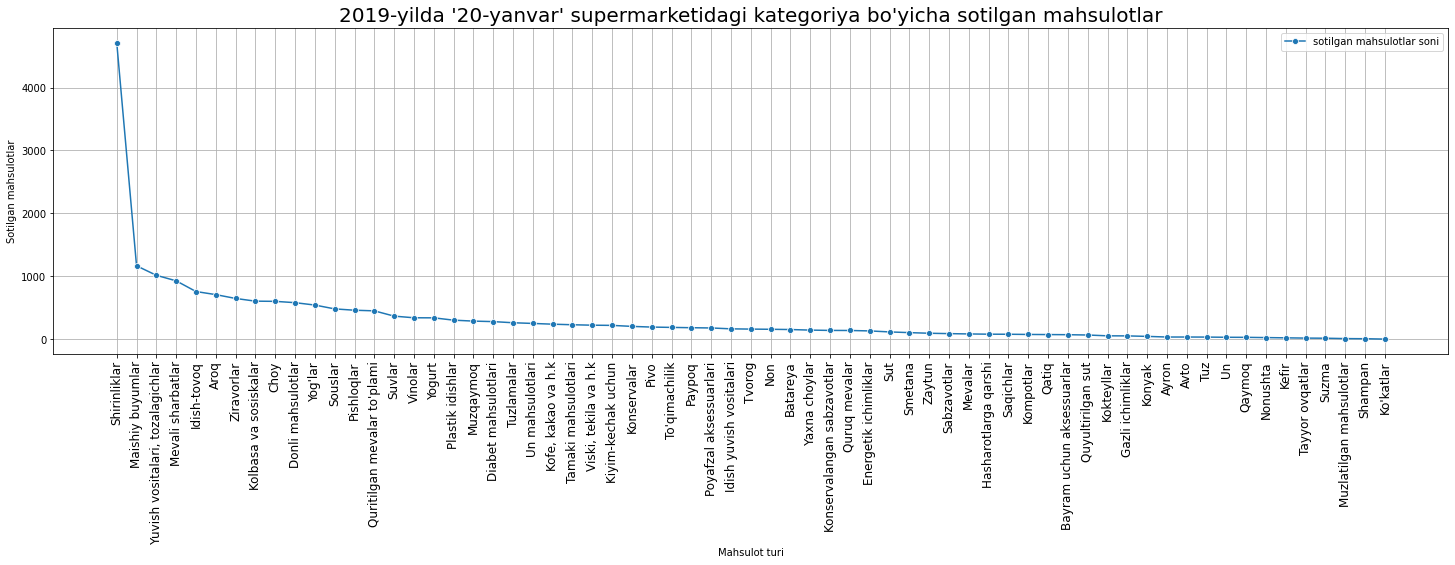

In [14]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda '20-yanvar' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [15]:
#10 2019-yilda "20-yanvar" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10901.24
Avto,184.27
Ayron,25.05
Batareya,566.71
Bayram uchun aksessuarlar,193.94
...,...
Yog'lar,4725.84
Yogurt,416.82


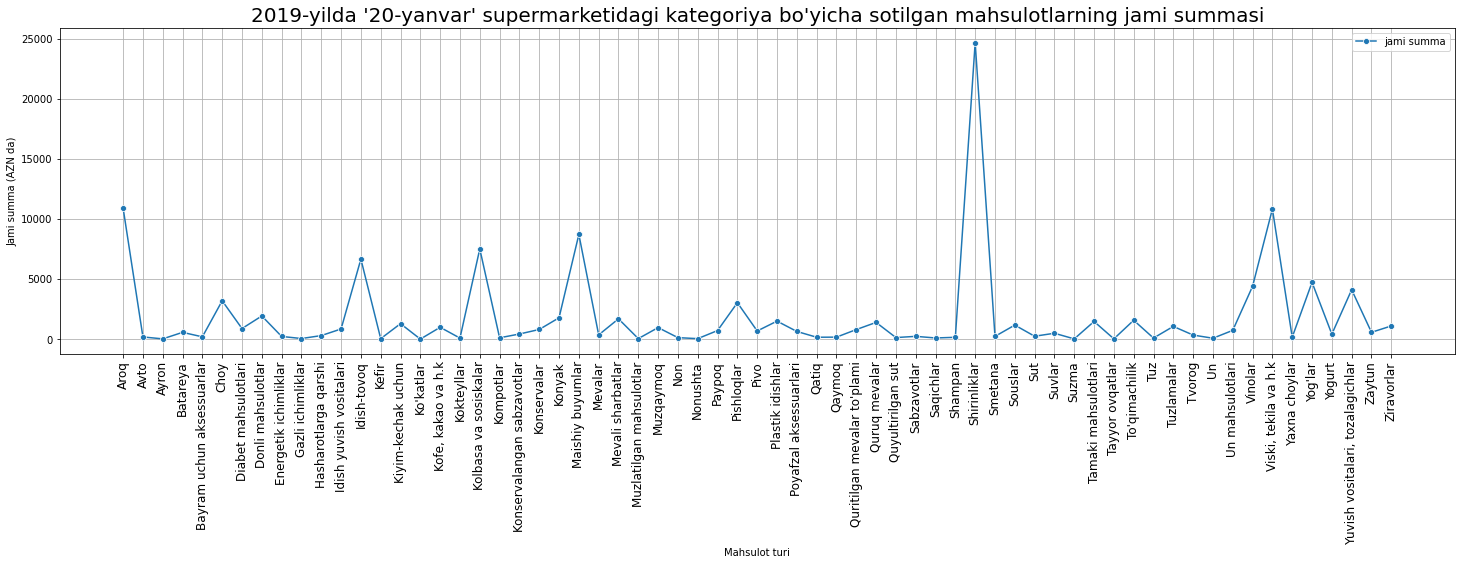

In [16]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda '20-yanvar' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [17]:
#11 2019-yilda "20-yanvar" supermarketida nechta mijoz mahsulotni bonus karta orqali 
#xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10261,10246


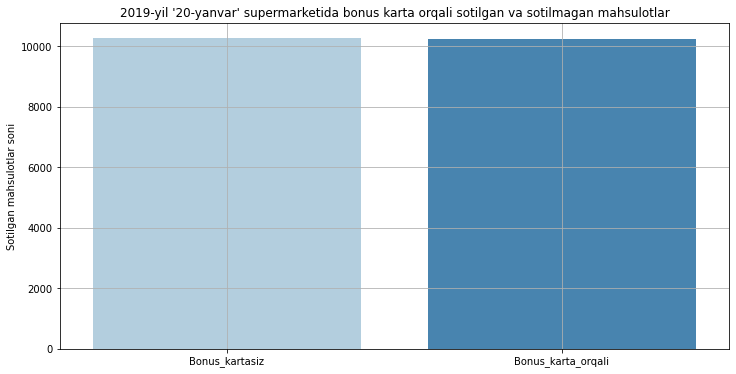

In [19]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil '20-yanvar' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [20]:
#12 2019-yilda "20-yanvar" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2000
Fevral,1777
Mart,2030
Aprel,2148
May,1924
Iyun,2019
Iyul,2119
Avgust,2096
Sentabr,2079
Oktabr,2315


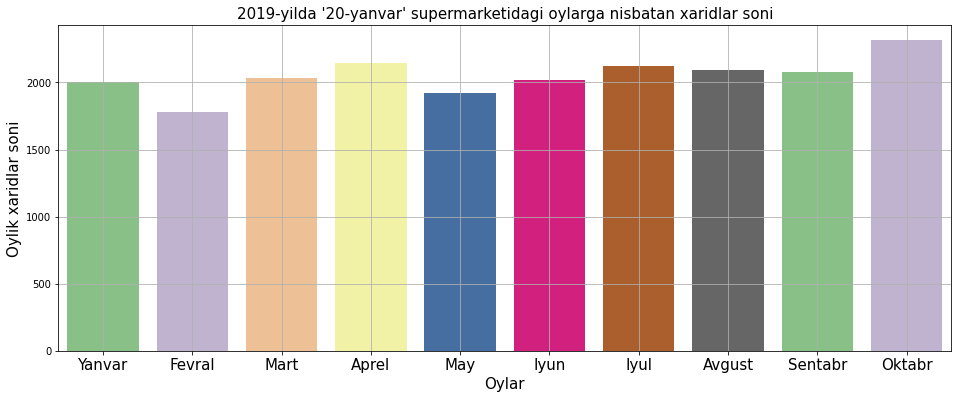

In [22]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda '20-yanvar' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [23]:
#13 2019-yilda "20-yanvar" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3000
Seshanba,3063
Chorshanba,2945
Payshanba,3088
Juma,2786
Shanba,2955
Yakshanba,2670


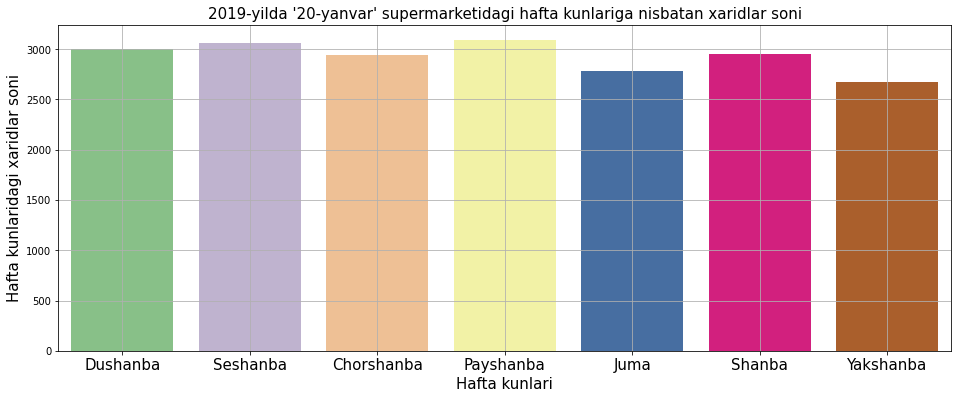

In [24]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda '20-yanvar' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [25]:
#14 2019-yilda "20-yanvar" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,702
2,642
3,722
4,776
5,703
6,675
7,607
8,647
9,598
10,582


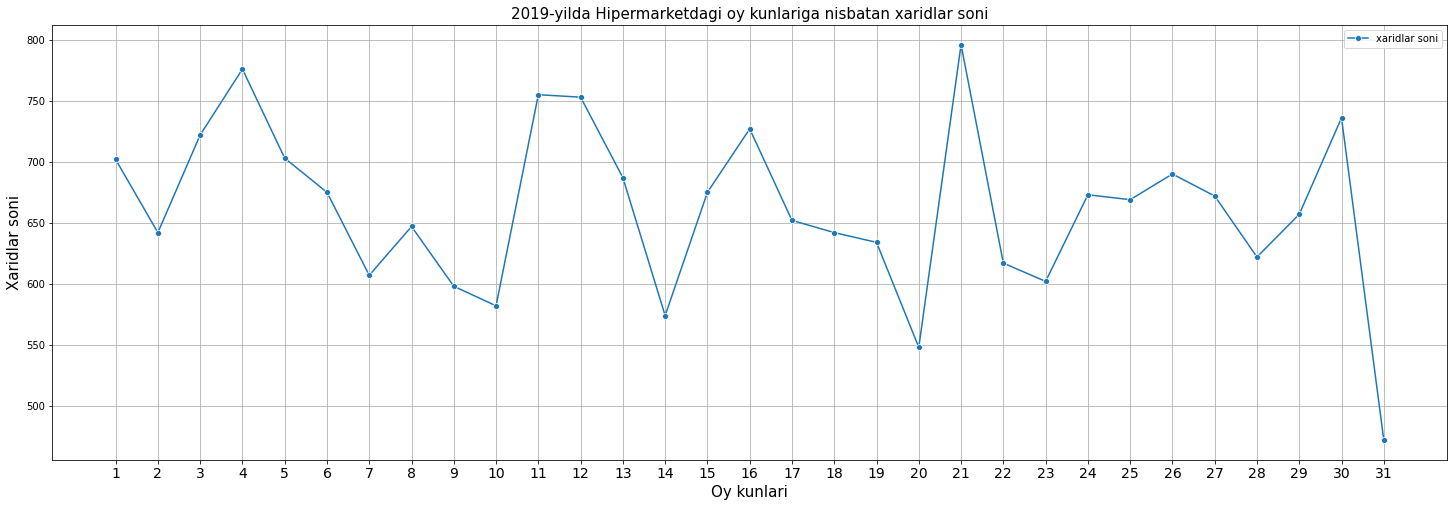

In [26]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda Hipermarketdagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [27]:
#15 2019-yil '20-yanvar' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [28]:
len(oy_sanalari)

310

In [29]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [30]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [31]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,79,67,41,40,34,58,71,99,81,55,76,81,87,62,88,59,27,40,60,37,68,43,47,43,93,92,62,102,46,99,63
Fevral,57,71,80,110,77,85,47,82,43,54,78,63,51,58,27,88,39,60,67,54,40,54,75,68,67,81,28,73,0,0,0
Mart,47,69,47,91,78,79,59,74,45,40,65,72,66,64,57,116,32,69,80,30,105,55,70,39,48,94,64,69,47,101,58
Aprel,79,73,52,99,86,53,83,39,70,82,72,82,45,75,91,55,99,97,39,70,138,67,56,42,94,35,89,68,48,70,0
May,48,47,54,60,81,47,48,47,76,68,89,70,85,48,38,59,75,39,59,47,92,59,79,76,47,45,85,54,79,61,62
Iyun,60,50,56,71,89,65,84,67,39,60,82,80,64,28,85,58,64,71,53,65,84,54,77,79,76,50,75,53,101,79,0
Iyul,96,40,116,73,44,85,40,38,42,85,81,88,81,50,79,72,84,73,62,46,105,84,61,55,60,50,80,34,88,54,73
Avgust,52,67,98,71,84,69,50,55,61,48,64,85,56,82,51,83,71,66,58,47,63,82,51,68,37,73,50,70,82,73,129
Sentabr,86,76,76,78,67,88,69,58,65,34,59,65,78,64,83,99,87,64,99,95,33,45,44,86,65,115,54,37,46,64,0
Oktabr,98,82,102,83,63,46,56,88,76,56,89,67,74,43,76,38,74,63,57,57,68,74,42,117,82,55,85,62,120,135,87


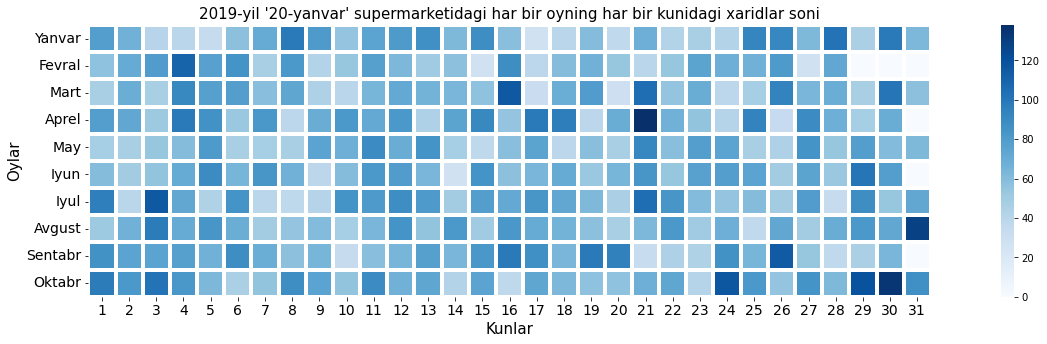

In [33]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil '20-yanvar' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

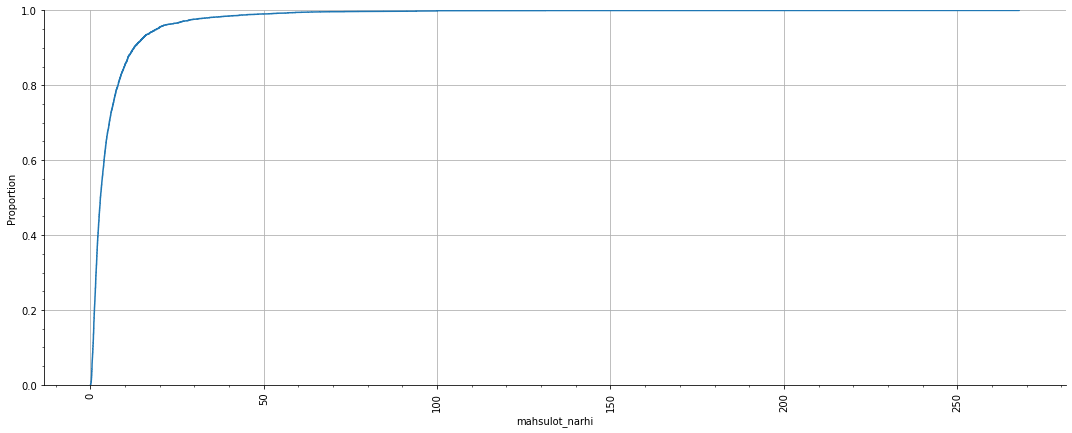

In [51]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 5 azngacha, 90% i esa 20azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='major')
plt.minorticks_on()
plt.show()